In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [10]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [11]:
def GD(grad, x0, eta):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if np.linalg.norm(grad(x_new))/np.array(x0).size < 1e-3:
            break
        x.append(x_new)
    return x

def GD_momentum(grad, theta_init, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new))/np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v_old = v_new
    return theta 

def GD_NAG(grad, theta_init, eta, gamma):
    theta = [theta_init]
    v = [np.zeros_like(theta_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta*grad(theta[-1] - gamma*v[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new))/np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v.append(v_new)
    return theta
    
# w_init = np.array([[2], [1]])
# (w_mm, it_mm) = GD_NAG(w_init, grad, .5, 0.9)

In [12]:
def grad(x):
    return 2*x+ 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

x1 = GD(grad, -5, .1)
x2 = GD(grad, 5, .1)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), len(x1)))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), len(x2)))

Solution x1 = -1.110667, cost = -3.246394, obtained after 12 iterations
Solution x2 = -1.110341, cost = -3.246394, obtained after 30 iterations


# GD cho bài toán linear regression
## Solution found by scikit-learn

Solution found by sklearn: [4.05084062 2.95886124]


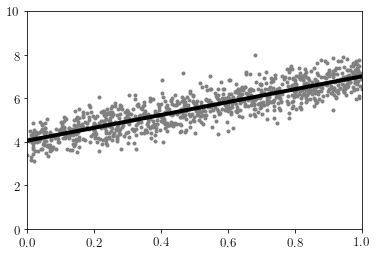

In [15]:
from sklearn.linear_model import LinearRegression 
X = np.random.rand(1000)
y = 4 + 3 * X + .5*np.random.randn(1000) # noise added

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

w, b = model.coef_[0][0], model.intercept_[0]
sol_sklearn = np.array([b, w])
print('Solution found by sklearn:', sol_sklearn)

# Draw the fitting line 
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w*x0 + b
filename = 'LR_data.pdf'
with PdfPages(filename) as pdf: 
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.plot(X, y, '.', color = 'gray')     # data 
    plt.plot(x0, y0, 'k', linewidth = 4)   # the fitting line
    plt.axis([0, 1, 0, 10])
    pdf.savefig(bbox_inches = 'tight')
    plt.show()

## Solution by gradient descent

In [16]:
# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis = 1)

def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w))**2

In [17]:
def check_grad(fn, gr, X):
    # convert X to an 1d array, later we'll need only one for loop
    X_flat    = X.reshape(-1)
    shape_X   = X.shape                # original shape of X 
    num_grad  = np.zeros_like(X)       # numerical grad, shape = shape of X 
    grad_flat = np.zeros_like(X_flat)  # 1d version of grad
    eps       = 1e-6            # a small number, 1e-10 -> 1e-6 is often good
    numElems  = X_flat.shape[0] # number of elements in X 
    # calculate numerical gradient 
    for i in range(numElems):          # iterate over all elements of X 
        Xp_flat      = X_flat.copy()
        Xn_flat      = X_flat.copy()
        Xp_flat[i]  += eps
        Xn_flat[i]  -= eps
        Xp           = Xp_flat.reshape(shape_X) 
        Xn           = Xn_flat.reshape(shape_X)
        grad_flat[i] = (fn(Xp) - fn(Xn))/(2*eps)

    num_grad = grad_flat.reshape(shape_X) 
    
    diff = np.linalg.norm(num_grad - gr(X))
    print('Difference between two methods should be small:', diff)


In [18]:
check_grad(cost, grad, np.random.randn(2))

Difference between two methods should be small: 1.3501452523615281e-09


In [19]:
w_init = np.array([2, 1])
w1 = GD(grad, w_init, 1)
print('Sol found by GD: w = ', w1[-1], ',\nafter %d iterations.' %len(w1))

Sol found by GD: w =  [4.06547955 2.93246144] ,
after 47 iterations.


## Visulize solution 

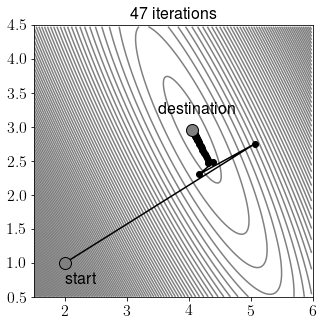

In [26]:
import matplotlib
import matplotlib.pyplot as plt

N = X.shape[0]

# compute pars for ellipse
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N

delta = 0.025
xg = np.arange(1.5, 6.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
# Z = np.linalg.norm(Xg*Xbar[:, 0] + Yg*Xbar[:, 1] - y)**2
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

def lr_gd_draw(w1, filename, dest = True):
    w_hist = np.array(w1)
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.cla()
    with PdfPages(filename) as pdf:
        plt.axis([1.5, 6, 0.5, 4.5])
        plt.tick_params(axis='both', which='major', labelsize=13)
        CS = plt.contour(Xg, Yg, Z, 100, colors='gray')
        plt.plot(w_hist[:, 0], w_hist[:, 1], marker='o',color='k',linestyle='-', markeredgecolor = 'k')
        plt.plot(b, w, 'o', color = 'gray', markersize = 12, markeredgecolor = 'k')
        plt.plot(w_hist[0,0], w_hist[0,1], 'o', color = 'gray', markersize = 12, markeredgecolor = 'k')
        str0 = '%d iterations' % w_hist.shape[0]
        plt.title(str0, fontsize = 16)
        plt.tick_params(axis='both', which='major', labelsize=16)
        
        plt.text(2, 0.7, 'start', fontsize = 16)
        if dest:
            plt.text(3.5, 3.2, 'destination', fontsize = 16)
        pdf.savefig(bbox_inces = 'tight')
        plt.show()

lr_gd_draw(w1, 'LR_gd_1.pdf')

### Với learning rate nhỏ hơn

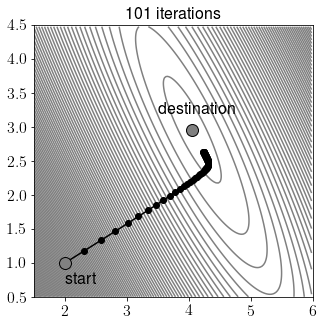

In [22]:
w2 = GD(grad, w_init, .1)
lr_gd_draw(w2, 'LR_gd_2.pdf')

## Với momentum 

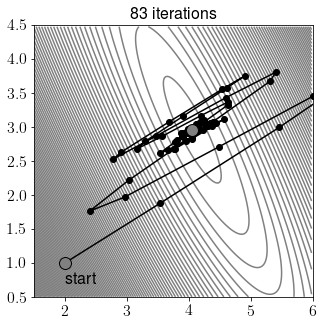

In [27]:
w3 = GD_momentum(grad, w_init, .5, .9)
lr_gd_draw(w3, 'LR_gd_moment.pdf', dest = False)

## Với NAG

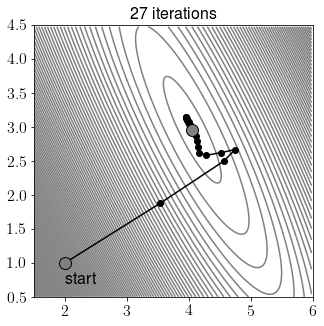

In [29]:
w4 = GD_NAG(grad, w_init, .5, .9)
lr_gd_draw(w4, 'LR_gd_nag.pdf', dest = False)